In [11]:
import pandas as pd
import csv

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [12]:
df = pd.DataFrame()

In [4]:
match_df = pd.read_csv('./t20s_male_csv2/211028.csv')
match_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,211028,2005,2005-06-13,The Rose Bowl,1,0.1,England,Australia,ME Trescothick,GO Jones,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,211028,2005,2005-06-13,The Rose Bowl,1,0.2,England,Australia,ME Trescothick,GO Jones,B Lee,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,211028,2005,2005-06-13,The Rose Bowl,1,0.3,England,Australia,GO Jones,ME Trescothick,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,211028,2005,2005-06-13,The Rose Bowl,1,0.4,England,Australia,GO Jones,ME Trescothick,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,211028,2005,2005-06-13,The Rose Bowl,1,0.5,England,Australia,GO Jones,ME Trescothick,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print(match_df.columns)

# remove columns season, start_date, striker, non_striker, bowler, wides, noballs, byes, legbyes, penalty, player_dismissed, other_wicket_type, other_player_dismissed
match_df = match_df.drop(columns=['season', 'start_date', 'striker', 'non_striker', 'bowler', 'penalty', 'player_dismissed', 'other_wicket_type', 'other_player_dismissed'])

print(match_df.columns)

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')
Index(['match_id', 'venue', 'innings', 'ball', 'batting_team', 'bowling_team',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'wicket_type'],
      dtype='object')


In [ ]:
match_df

In [6]:
# add runs_off_bat and extras in the first innings to get the target
first_innings = match_df[match_df['innings'] == 1]
target = first_innings['runs_off_bat'].sum() + first_innings['extras'].sum() + 1
print('Target:', target)

Target: 180


In [ ]:
second_innings = match_df[match_df['innings'] == 2].copy()

# iterate over every row and subtract runs_off_bat and extras from the target -> runs_required
runs_required = target
wickets_remaining = 10
balls_remaining = 120

# for run rate
runs_scored = 0
crr = 0
rrr = target / 20

for index, row in second_innings.iterrows():
    runs_required -= row['runs_off_bat'] + row['extras']
    balls_remaining -= 1

    if not pd.isna(row['wicket_type']):
        wickets_remaining -= 1
    
    if not pd.isna(row['wides']) or not pd.isna(row['noballs']):
        balls_remaining += 1

    runs_scored += row['runs_off_bat'] + row['extras']
    crr = (runs_scored * 6) / (120 - balls_remaining)
    rrr = runs_required / (balls_remaining / 6)

    # set datatype for runs_required, wickets_remaining and balls_remaining to int not float
    second_innings.loc[index, 'runs_required'] = runs_required
    second_innings.loc[index, 'wickets_remaining'] = wickets_remaining
    second_innings.loc[index, 'balls_remaining'] = balls_remaining
    second_innings.loc[index, 'crr'] = round(crr, 2)
    second_innings.loc[index, 'rrr'] = round(rrr, 2)

second_innings['runs_required'] = second_innings['runs_required'].astype('int')
second_innings['wickets_remaining'] = second_innings['wickets_remaining'].astype('int')
second_innings['balls_remaining'] = second_innings['balls_remaining'].astype('int')

second_innings[['ball', 'runs_required', 'wickets_remaining', 'balls_remaining', 'crr', 'rrr']]

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

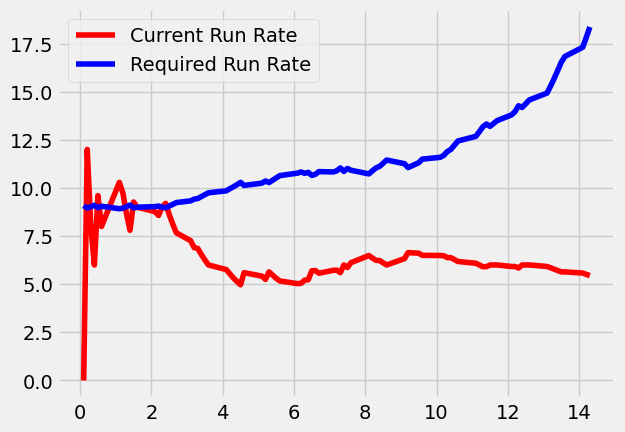

In [10]:
# plot the current run rate and required run rate in one plot
plt.plot(second_innings['ball'], second_innings['crr'], label='Current Run Rate', color='r')
plt.plot(second_innings['ball'], second_innings['rrr'], label='Required Run Rate', color='b')
plt.legend()
plt.show()

In [13]:
with open('./t20s_male_csv2/211028_info.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        if row[0] == 'info' and row[1] == 'winner':
            winner_name = row[2]
            if winner_name == second_innings['batting_team'].iloc[0]:
                second_innings['winner'] = 1
            else:
                second_innings['winner'] = 0
            break

In [14]:
second_innings['winner'] = second_innings['winner'].astype('int')

In [ ]:
second_innings[['ball', 'runs_required', 'wickets_remaining', 'balls_remaining', 'crr', 'rrr', 'winner']]

In [7]:
# get all match ids
import os
import re

match_ids = []
for file in os.listdir('./t20s_male_csv2'):
    if file.endswith('.csv') and 'info' not in file:
        match_id = re.findall(r'\d+', file)[0]
        match_ids.append(match_id)

print(len(match_ids))

2174


In [ ]:
iteration = 0

for match_id in match_ids:
    if match_id in [
        1263166,  582186,  534234, 1263167, 1407094, 1144172, 1263164,
        423788, 1144991, 1188380, 1349389, 1405327,  366707, 1286674,
        1322277,  902653, 1267311, 1142504,  412681,  951319, 1177484,
        1343767, 1278691, 1198244, 1115799, 1343758, 1399120,  566927,
        1263472, 1370791, 1388214, 1197398, 1322362, 1186492, 1216418,
        1343747, 1343790,  237242, 1343746, 1400975, 1183527,  533282,
        1176795,  533292, 1317488, 1349127, 1339617, 1185187, 1343742,
        1298152,  533284, 1354799,  730293, 1343743, 1389398, 1187669,
        1141835, 1380586, 1233956, 1257949, 1317149,  350050, 1187680,
        1412534, 1203677,  287862,  571149, 1349387, 1041617, 1187679,
        1407719, 1422804
    ]:
        continue

    iteration += 1
    print(f'Iteration: {iteration} - Match ID: {match_id}')

    match_df = pd.read_csv(f'./t20s_male_csv2/{match_id}.csv')
    match_df = match_df.drop(columns=['season', 'start_date', 'striker', 'non_striker', 'bowler', 'penalty', 'player_dismissed', 'other_wicket_type', 'other_player_dismissed'])
    
    first_innings = match_df[match_df['innings'] == 1]
    target = first_innings['runs_off_bat'].sum() + first_innings['extras'].sum() + 1

    second_innings = match_df[match_df['innings'] == 2].copy()

    if second_innings.empty:
        continue

    # iterate over every row and subtract runs_off_bat and extras from the target -> runs_required
    runs_required = target
    wickets_remaining = 10
    balls_remaining = 120

    # for run rate
    runs_scored = 0
    crr = 0
    rrr = target / 20

    for index, row in second_innings.iterrows():
        runs_required = max(0, runs_required - (row['runs_off_bat'] + row['extras']))
        balls_remaining -= 1

        if not pd.isna(row['wicket_type']):
            wickets_remaining -= 1
        
        if not pd.isna(row['wides']) or not pd.isna(row['noballs']):
            balls_remaining += 1

        print(row['runs_off_bat'], row['extras'])
        runs_scored += (row['runs_off_bat'] + row['extras'])

        if balls_remaining == 120:
            crr = runs_scored
        else:
            crr = (runs_scored * 6) / (120 - balls_remaining)

        if balls_remaining == 0:
            rrr = runs_required / (1 / 6)
        else:
            rrr = runs_required / (balls_remaining / 6)

        # set datatype for runs_required, wickets_remaining and balls_remaining to int not float
        second_innings.loc[index, 'runs_required'] = runs_required
        second_innings.loc[index, 'runs_scored'] = runs_scored
        second_innings.loc[index, 'wickets_remaining'] = wickets_remaining
        second_innings.loc[index, 'balls_remaining'] = balls_remaining
        second_innings.loc[index, 'crr'] = round(crr, 2)
        second_innings.loc[index, 'rrr'] = round(rrr, 2)

    with open(f'./t20s_male_csv2/{match_id}_info.csv', 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            if row[0] == 'info' and row[1] == 'winner':
                winner_name = row[2]
                if winner_name == second_innings['batting_team'].iloc[0]:
                    second_innings['winner'] = 1
                else:
                    second_innings['winner'] = 0
                break
        

    df = pd.concat([df, second_innings], ignore_index=True)

    print('Done', end='\n\n')

In [19]:
df.to_csv('./data/second_innings_updated.csv', index=False)